In [1]:
import time
import numpy as np
from gen3_env import make

In [2]:
HOME = [0.0, 0.0, 3.14, -1.57, 0.0, -1.57, 1.57] 

env = make(
    "gen3",
    control_mode="joint_trajectory", 
    joint_states_topic="/joint_states",
    external_rgb_topic="/camera/camera/color/image_raw",
    wrist_rgb_topic="/camera/color/image_raw",
    joint_traj_topic="/joint_trajectory_controller/joint_trajectory",
    twist_cmd_topic="/twist_controller/commands",
    home_on_reset=False,
    home_joint_positions=HOME,      
    robotiq_action_name="/robotiq_gripper_controller/gripper_cmd", 
    gripper_min_pos=0.0, gripper_max_pos=0.8,     
)

In [3]:
obs = env.reset()
print("obs keys:", obs.keys())  # expect rgb_external, rgb_wrist, joint_position, joint_velocity, joint_effort

obs keys: dict_keys(['rgb_external', 'rgb_wrist', 'joint_position', 'joint_velocity', 'joint_effort', 'gripper_commanded'])


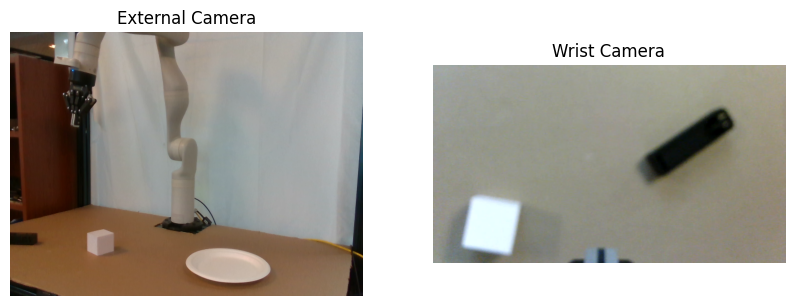

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(obs["rgb_external"])
axs[0].set_title("External Camera")
axs[0].axis("off")

axs[1].imshow(obs["rgb_wrist"])
axs[1].set_title("Wrist Camera")
axs[1].axis("off")

plt.show()


In [6]:

# Example: small joint move over 1.5s
target = obs["joint_position"].copy()
target -= 0.1
env.step(target, seconds=2.5)


{'rgb_external': array([[[ 61,  51,  51],
         [ 62,  52,  52],
         [ 63,  56,  50],
         ...,
         [161, 174, 173],
         [164, 176, 178],
         [163, 175, 177]],
 
        [[ 60,  53,  47],
         [ 61,  54,  48],
         [ 63,  56,  50],
         ...,
         [161, 173, 175],
         [164, 176, 178],
         [163, 175, 177]],
 
        [[ 63,  56,  48],
         [ 66,  59,  51],
         [ 61,  54,  46],
         ...,
         [162, 172, 175],
         [164, 174, 179],
         [164, 174, 179]],
 
        ...,
 
        [[  8,   9,   5],
         [  9,  10,   6],
         [  4,  10,   8],
         ...,
         [ 23,  22,  26],
         [ 23,  19,  22],
         [ 27,  23,  26]],
 
        [[  7,   7,   3],
         [ 10,  10,   6],
         [  6,  10,   5],
         ...,
         [ 21,  17,  18],
         [ 22,  16,  18],
         [ 26,  20,  22]],
 
        [[  7,   7,   1],
         [  9,   9,   3],
         [  6,  10,   5],
         ...,
         [ 2

In [6]:
target2 = obs["joint_position"].copy()
env.step(list(target2) + [0.5], seconds=10)   # close gripper

{'rgb_external': array([[[ 59,  53,  55],
         [ 61,  55,  57],
         [ 61,  55,  59],
         ...,
         [140, 158, 165],
         [135, 158, 163],
         [136, 159, 164]],
 
        [[ 58,  54,  55],
         [ 60,  56,  57],
         [ 60,  56,  57],
         ...,
         [139, 157, 164],
         [137, 158, 164],
         [137, 158, 164]],
 
        [[ 58,  55,  52],
         [ 60,  57,  54],
         [ 60,  57,  54],
         ...,
         [141, 157, 165],
         [138, 156, 163],
         [139, 157, 164]],
 
        ...,
 
        [[  0,   8,   5],
         [  0,   8,   5],
         [  0,   8,   5],
         ...,
         [  8,  16,  13],
         [  6,  17,  15],
         [  9,  20,  18]],
 
        [[  0,   8,   5],
         [  0,   7,   4],
         [  0,   7,   4],
         ...,
         [  7,  16,   9],
         [  5,  16,  12],
         [  8,  19,  15]],
 
        [[  0,   6,   4],
         [  0,   6,   4],
         [  0,   7,   4],
         ...,
         [  

In [15]:
env.open_gripper()

In [14]:
env.close_gripper()

In [17]:
env.close()